In [2]:
import numpy as np
import pandas as pd
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
#reading the data
df = pd.read_csv("J:\College Stuff\Machine Learning Journey\Machine Learning By Andrew NG\Regression\TeslaStockpricesDataset.csv")

In [4]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
#Understanding Data
#Date: the Date of the stock reading
#Open: opening price for stock in the day
#High: Highest price of stock in the day
#Low: lowest pricee of stock in the day
#close: The closed price for the stock that day
#Volume: Stocks traded that day

In [6]:
#Statistical Information of the dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [7]:
#Checking null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [9]:
#Dropping Date as it's not gonna be used 
df = df.drop(['Date'], axis=1)

In [10]:
#The prediction of stocks is based on 
#Opening Price, Highest Price, Lowest Price, Volume
#To predict the closing Price

In [11]:
#Assigning Target variable
y = df['Close']

#Assigning feature variable
x = df.drop(["Close", "Adj Close"], axis=1)

In [12]:
#Assigning Training Set and Testing to 80:20 Ratio
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.1)

In [13]:
#Assigning linear regression to mode and the training data too
Model = LinearRegression()

Model.fit(xTrain, yTrain)



LinearRegression()

In [14]:
#Accuracy of the model
Model.score(xTest, yTest)

0.9997032877810528

In [15]:
#Coefficients
print("Intercept: ", Model.intercept_)
print("Coefficients: ")
for _ in Model.coef_:
    print(_)

Intercept:  -0.03827925353485284
Coefficients: 
-0.6582981507941382
0.9017060362654798
0.755715434793781
-2.638611164934038e-08


In [16]:
#Prediction
predictions = Model.predict(xTest)

In [17]:
comparison = pd.DataFrame({'Predicted Values':predictions, 'Actual Values':yTest})

In [18]:
print(comparison.head(15))

      Predicted Values  Actual Values
226          27.505049      27.969999
123          32.295859      32.630001
554          29.343495      29.350000
32           17.959543      18.320000
817         188.186867     188.639999
2366        352.668618     352.220001
468          32.157708      32.470001
1906        345.886429     345.890015
478          28.645855      28.770000
2159        292.648707     296.380005
325          27.349456      27.610001
1082        227.411931     229.699997
1367        233.757531     231.990005
2291        227.418137     230.750000
501          33.591308      33.790001


H:\pc programs\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Volume', ylabel='Close'>

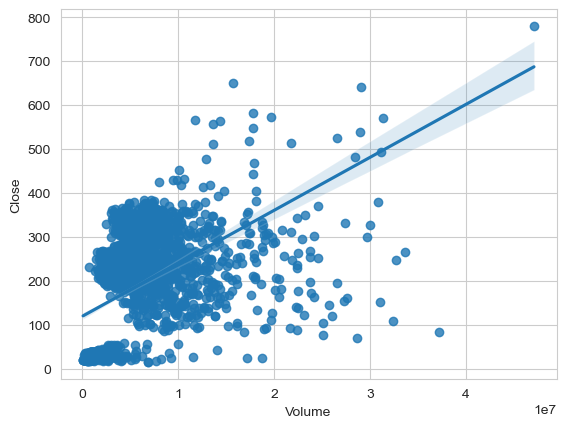

In [21]:
#Visualization
seaborn.set_style("whitegrid")
seaborn.regplot(x['Volume'],y)


H:\pc programs\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close', ylabel='Open'>

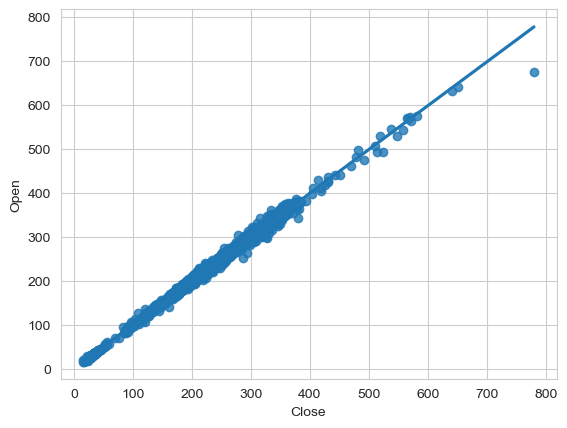

In [22]:
#Opening Price and Closing Price
seaborn.regplot(y,x["Open"])


H:\pc programs\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close', ylabel='High'>

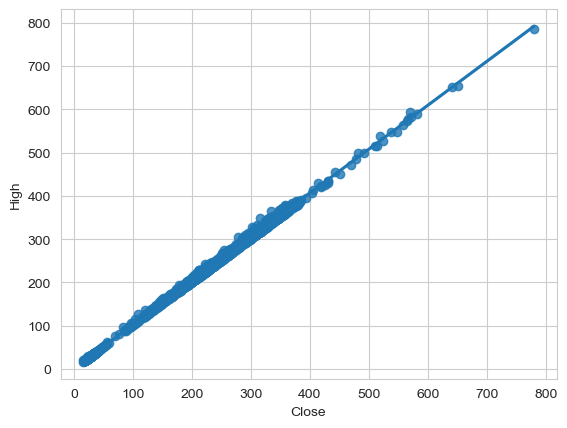

In [23]:
#Highest Price vs Closing Price
seaborn.regplot(y,x["High"])

H:\pc programs\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close', ylabel='Low'>

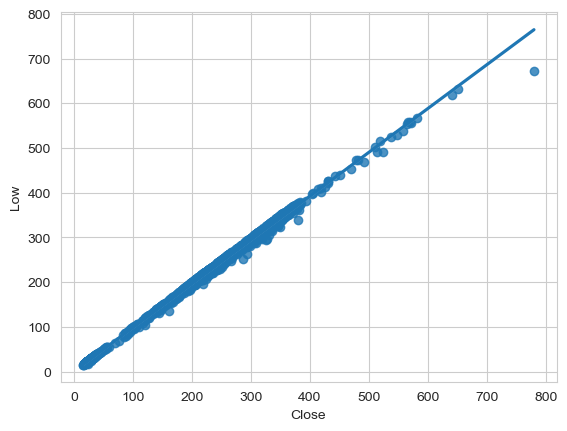

In [24]:
#Lowest Price vs Closing Pirce
seaborn.regplot(y,x["Low"])